In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load Dataset

#### Application Train

In [2]:
application_train = pd.read_csv('D:\\Project Based Internship Home Credit\\application_train.csv')
application_train.head(8)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Bureau Balance

In [4]:
bureaubalance_df= pd.read_csv('D:\\Project Based Internship Home Credit\\bureau_balance.csv')
bureaubalance_df.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [5]:
bureaubalance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


#### Bureau

In [6]:
bureau_df = pd.read_csv('D:\\Project Based Internship Home Credit\\bureau.csv')
bureau_df.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


#### Credit Card Balance

In [8]:
creditcardbalance = pd.read_csv('D:\\Project Based Internship Home Credit\\credit_card_balance.csv')
creditcardbalance.head(8)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.0,0.0,0.0,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.0,0.0,0.0,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.0,0.0,0.0,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0


In [9]:
creditcardbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

#### Installments Payments

In [10]:
installmentspayments = pd.read_csv('D:\\Project Based Internship Home Credit\\installments_payments.csv')
installmentspayments.head(8)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165


In [11]:
installmentspayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


#### Pos Cash Balance

In [12]:
poscashbalance = pd.read_csv('D:\\Project Based Internship Home Credit\\POS_CASH_balance.csv')
poscashbalance.head(8)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0


In [13]:
poscashbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


#### Previous Application

In [14]:
previous_application = pd.read_csv('D:\\Project Based Internship Home Credit\\previous_application.csv')
previous_application.head(8)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
application_test = pd.read_csv('D:\\Project Based Internship Home Credit\\application_test.csv')
application_test.head(8)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [16]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Application Test

In [17]:
applicationtest = pd.read_csv('D:\\Project Based Internship Home Credit\\application_test.csv')
applicationtest.head(8)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [18]:
applicationtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


# Checking Missing Value, Data Duplicate on The Table and View of Data Distribution

In [19]:
application_train.isnull().mean().sort_values(ascending = False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [20]:
print('Jumlah data duplikat',application_train.duplicated().sum())

Jumlah data duplikat 0


In [21]:
bureaubalance_df.isnull().mean().sort_values(ascending = False)

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [22]:
print('Jumlah data duplikat',bureaubalance_df.duplicated().sum())

Jumlah data duplikat 0


In [23]:
bureau_df.isnull().mean().sort_values(ascending = False)

AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
SK_ID_BUREAU              0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
SK_ID_CURR                0.000000
dtype: float64

In [24]:
print('Jumlah data duplikat',bureau_df.duplicated().sum())

Jumlah data duplikat 0


In [25]:
creditcardbalance.isnull().mean().sort_values(ascending = False)

AMT_PAYMENT_CURRENT           0.199981
AMT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
AMT_INST_MIN_REGULARITY       0.079482
SK_ID_PREV                    0.000000
AMT_TOTAL_RECEIVABLE          0.000000
SK_DPD                        0.000000
NAME_CONTRACT_STATUS          0.000000
CNT_DRAWINGS_CURRENT          0.000000
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECIVABLE                 0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
SK_ID_CURR                    0.000000
AMT_DRAWINGS_CURRENT          0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_BALANCE                   0.000000
MONTHS_BALANCE                0.000000
SK_DPD_DEF                    0.000000
dtype: float64

In [26]:
print('Jumlah data duplikat',creditcardbalance.duplicated().sum())

Jumlah data duplikat 0


In [27]:
installmentspayments.isnull().mean().sort_values(ascending = False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [28]:
print('Jumlah data duplikat',installmentspayments.duplicated().sum())

Jumlah data duplikat 0


In [29]:
poscashbalance.isnull().mean().sort_values(ascending = False)

CNT_INSTALMENT_FUTURE    0.002608
CNT_INSTALMENT           0.002607
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [30]:
print('Jumlah data duplikat',poscashbalance.duplicated().sum())

Jumlah data duplikat 0


In [31]:
previous_application.isnull().mean().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
AMT_DOWN_PAYMENT               5.363648e-01
RATE_DOWN_PAYMENT              5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
DAYS_TERMINATION               4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
NAME_YIELD_GROUP               0.000000e+00
NAME_PORTFOLIO                 0.000000e+00
NAME_SELLER_INDUSTRY           0.000000e+00
SELLERPLACE_AREA               0.000000e+00
CHANNEL_TYPE                   0.000000e+00
NAME_PRODUCT_TYPE              0.000000e+00
SK_ID_PREV                     0

In [32]:
print('Jumlah data duplikat',previous_application.duplicated().sum())

Jumlah data duplikat 0


In [33]:
applicationtest.isnull().mean().sort_values(ascending = False)

COMMONAREA_AVG              0.687161
COMMONAREA_MODE             0.687161
COMMONAREA_MEDI             0.687161
NONLIVINGAPARTMENTS_AVG     0.684125
NONLIVINGAPARTMENTS_MODE    0.684125
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 121, dtype: float64

In [34]:
print('Jumlah data duplikat',applicationtest.duplicated().sum())

Jumlah data duplikat 0


#### Melihat Distribusi  AMT Credit

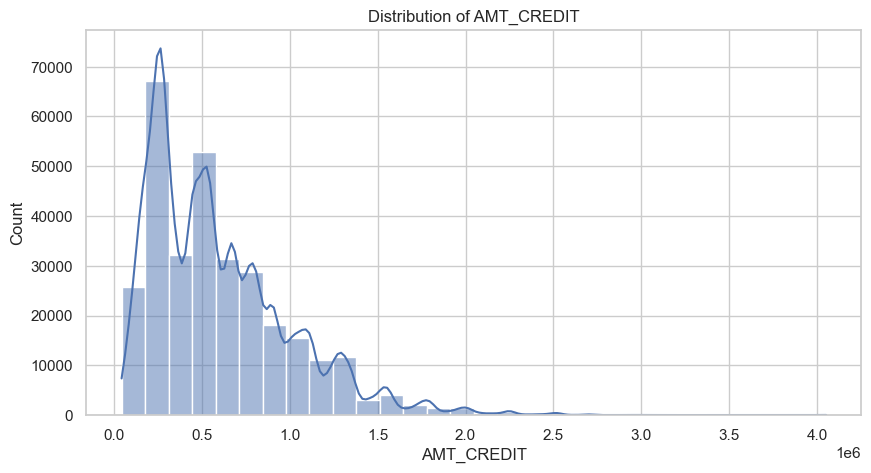

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.histplot(application_train["AMT_CREDIT"].dropna(), kde=True, bins=30)

plt.title("Distribution of AMT_CREDIT")
plt.show()

#### Melihat Distirbusi AMT Income Total

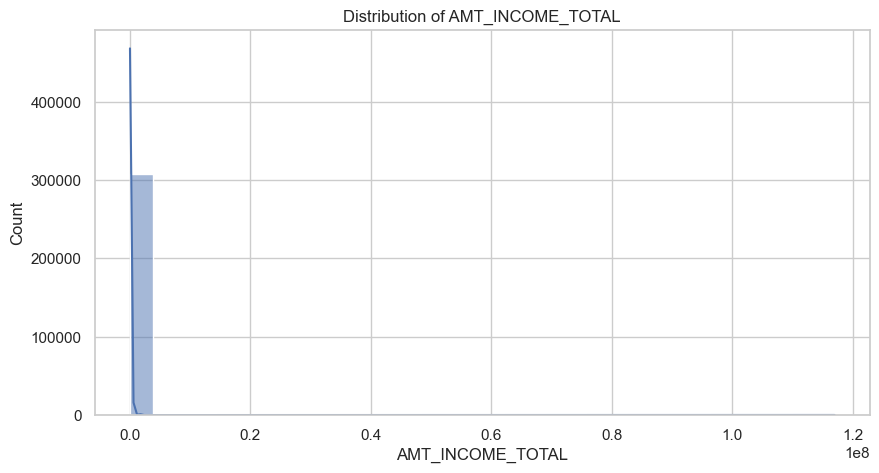

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.histplot(application_train["AMT_INCOME_TOTAL"].dropna(), kde=True, bins=30)

plt.title("Distribution of AMT_INCOME_TOTAL")
plt.show()

#### Melihat Distribusi AMT Good Price

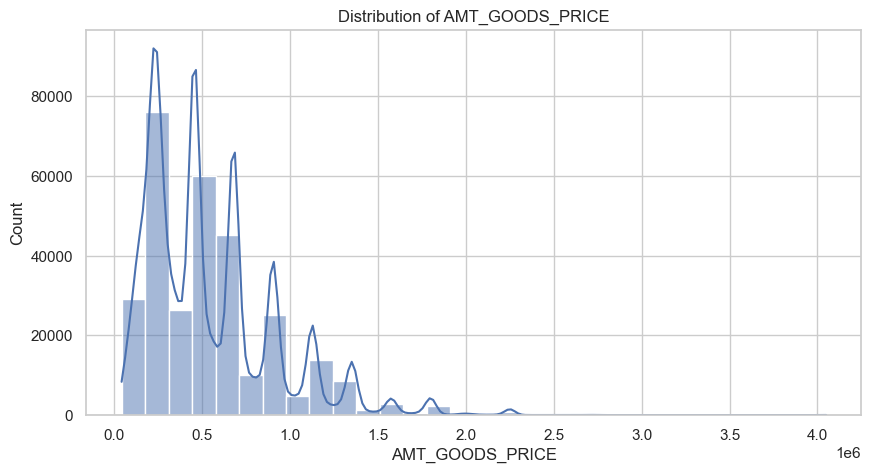

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.histplot(application_train["AMT_GOODS_PRICE"].dropna(), kde=True, bins=30)

plt.title("Distribution of AMT_GOODS_PRICE")
plt.show()

#### Melihat Distribusi pada kolom Target

In [38]:
temp = application_train["TARGET"].value_counts()
target_count = pd.DataFrame({'labels': temp.index,'values': temp.values})
target_count

,labels,values
0,0,282686
1,1,24825


##### Melihat Persentase pada kolom target (1 dan 0)

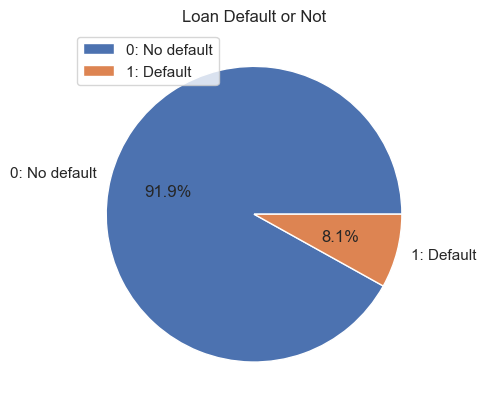

In [39]:
default = ["0: No default", "1: Default"]
plt.pie(temp, labels =default, autopct='%1.1f%%')
plt.title("Loan Default or Not")
plt.legend()
plt.show()

#### Melihat Distribusi Occupation Type 10 data terbanyak

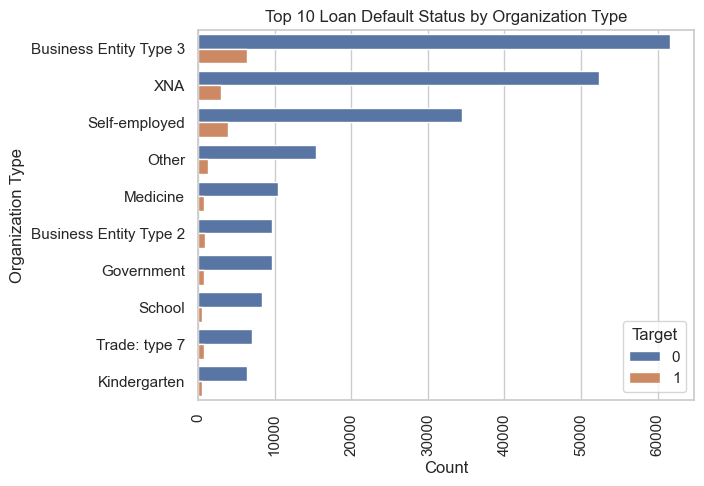

<Figure size 1000x600 with 0 Axes>

In [40]:
top_10_organizations = application_train['ORGANIZATION_TYPE'].value_counts().nlargest(10)
filtered_df = application_train[application_train['ORGANIZATION_TYPE'].isin(top_10_organizations.index)]
sns.set(style="whitegrid")
temp_occ = sns.countplot(y='ORGANIZATION_TYPE', hue='TARGET', data=filtered_df, order=top_10_organizations.index)

plt.xlabel('Count')
plt.xticks(rotation=90)
plt.ylabel('Organization Type')
plt.title('Top 10 Loan Default Status by Organization Type')
plt.legend(title='Target')

# Setel ukuran figur
plt.figure(figsize=(10, 6))

plt.show()

#### Melihat Distribusi Types of Organizations

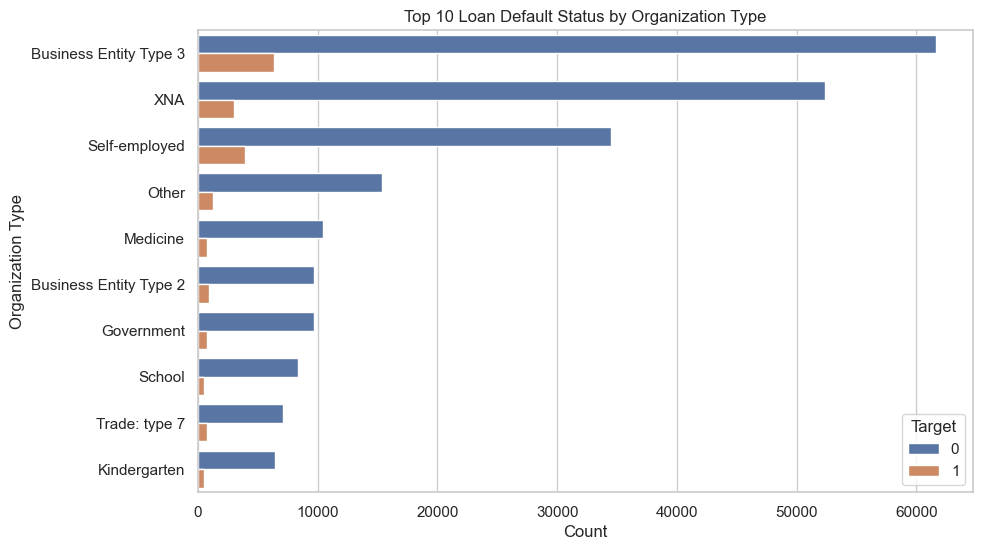

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'application_train' is your DataFrame
top_10_organizations = application_train['ORGANIZATION_TYPE'].value_counts().nlargest(10)

# Filter DataFrame only for the top 10 organizations
filtered_df = application_train[application_train['ORGANIZATION_TYPE'].isin(top_10_organizations.index)]

# Set the figure size before creating the countplot
plt.figure(figsize=(10, 6))

# Create countplot with sorted order
temp_occ = sns.countplot(y='ORGANIZATION_TYPE', hue='TARGET', data=filtered_df,order=top_10_organizations.index)

plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.title('Top 10 Loan Default Status by Organization Type')
plt.legend(title='Target')

plt.show()

#### Melihat Distribusi Data Client Lama dan Client Baru

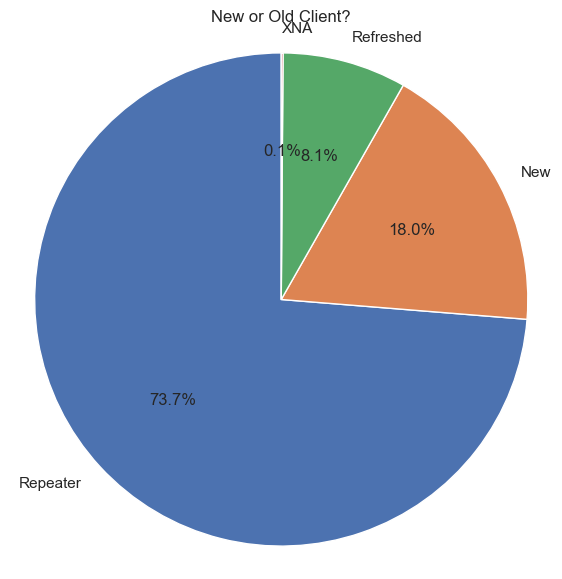

In [42]:
temp_prev2 = pd.DataFrame({'labels': previous_application["NAME_CLIENT_TYPE"].value_counts().index,'values': previous_application["NAME_CLIENT_TYPE"].value_counts().values})
plt.figure(figsize=(7, 7))
plt.pie(temp_prev2["values"],labels=temp_prev2["labels"], autopct='%1.1f%%', startangle=90)
plt.title("New or Old Client?")
plt.axis('equal')
plt.show()

#### Melihat Jumlah Client yang Mengajukan Asuransi

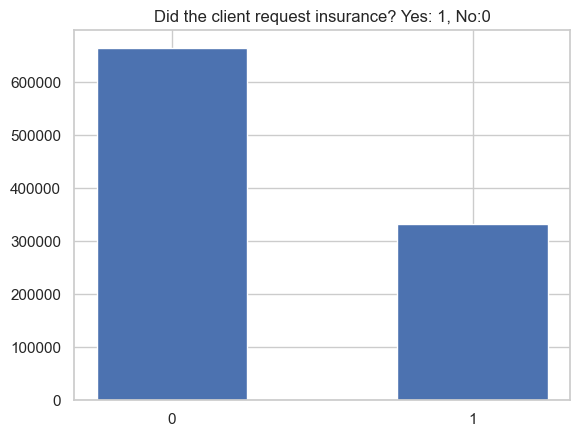

In [43]:
temp_prev3 = pd.DataFrame({'labels': previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().index,'values': previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts()})
plt.bar(temp_prev3["labels"], temp_prev3["values"], width=0.5)
plt.xticks([0, 1])
plt.title("Did the client request insurance? Yes: 1, No:0")
plt.show()

# Cleaning Data

In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

train_cop = application_train.copy()
test_cop = application_test.copy()

def categorical_col(df):
  cats = [col for col in list(df.columns) if df[col].dtypes == 'object']
  return cats

train_cat = categorical_col(train_cop)

for col in train_cat:
  le = preprocessing.LabelEncoder()
  le.fit(list(train_cop[col].values.astype('str')) + list(test_cop[col].values.astype('str')))
  train_cop[col] = le.transform(list(train_cop[col].values.astype('str')))
  test_cop[col] = le.transform(list(test_cop[col].values.astype('str')))

In [45]:
train_cop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling

### Data Outlier And Handling Data Outlier

In [46]:
# Identification of Column types
application_train_copy= application_train.copy()
application_test_copy= application_test.copy()
numeric_columns = application_train_copy.select_dtypes(include=['int', 'float']).columns
numeric_columns_test = application_test_copy.select_dtypes(include=['int', 'float']).columns

# Find columns with object/string data type
object_columns = application_train_copy.select_dtypes(include=['object']).columns
object_columns_test = application_test_copy.select_dtypes(include=['object']).columns

binary_columns = []
for column in application_train_copy.columns:
    unique_values = application_train_copy[column].value_counts()
    if set(unique_values.index).issubset([0, 1]):
        binary_columns.append(column)

binary_columns_test = []
for column in application_test_copy.columns:
    unique_values = application_test_copy[column].value_counts()
    if set(unique_values.index).issubset([0, 1]):
        binary_columns.append(column)

In [47]:
# Function for removing Outliers
def remove_outliers_zscore(df, threshold=3):
    # Calculate the z-scores for each column in the dataframe
    z_scores = np.abs(df - df.mean()) / df.std()

    # Identify the rows that are outliers
    outlier_mask = z_scores > threshold

    # Drop the outlier rows from the dataframe
    df = df.loc[~outlier_mask]

    return df

In [48]:
#Removal of outliers from numeric columns( excluding binary columns)
for column in numeric_columns:
  if column not in binary_columns:
    application_train_copy[column]= remove_outliers_zscore(application_train_copy[column], threshold=3)
    application_test_copy[column]= remove_outliers_zscore(application_test_copy[column], threshold=3)

### Data Imputation

In [49]:
from sklearn.impute import SimpleImputer

numeric_columns = application_train_copy.select_dtypes(include='number').columns
categorical_columns = application_train_copy.select_dtypes(include='object').columns

numeric_imputer = SimpleImputer(strategy='median')
application_train_copy[numeric_columns] = numeric_imputer.fit_transform(application_train_copy[numeric_columns])

# Impute missing values in categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
application_train_copy[categorical_columns] = categorical_imputer.fit_transform(application_train_copy[categorical_columns])

### Data Encoding

In [50]:
# Identify categorical columns
categorical_columns = application_train_copy.select_dtypes(include=['object']).columns

# Perform factorization on categorical columns
application_train_encoded = application_train_copy.copy()
application_train_encoded[categorical_columns] = application_train_encoded[categorical_columns].apply(lambda x: pd.factorize(x)[0])

# Display the encoded DataFrame
application_train_encoded.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0,0,0,0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,0,1,0,1,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,1,0,1,0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0,1,0,0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007.0,0.0,0,0,0,0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest Classifier

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

X = application_train_encoded.drop('TARGET', axis=1)
Y = application_train_encoded['TARGET']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

RandomForest_regular = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
RandomForest_regular.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [52]:
# Predict the target variable for the test data
y_pred = RandomForest_regular.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the AUC-ROC score of the model
auc_roc = roc_auc_score(Y_test, RandomForest_regular.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9193747696576842
AUC-ROC: 0.7188966630048899
Confusion Matrix:
[[84799     7]
 [ 7431    17]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84806
         1.0       0.71      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.81      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



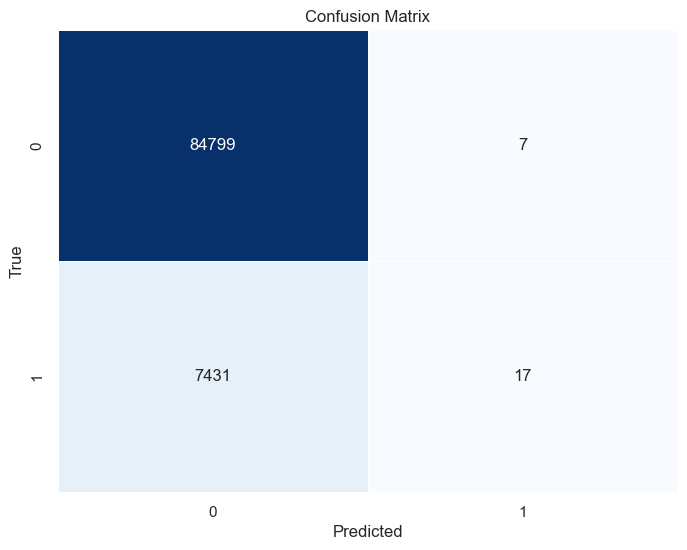

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(Y_test, y_pred)
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

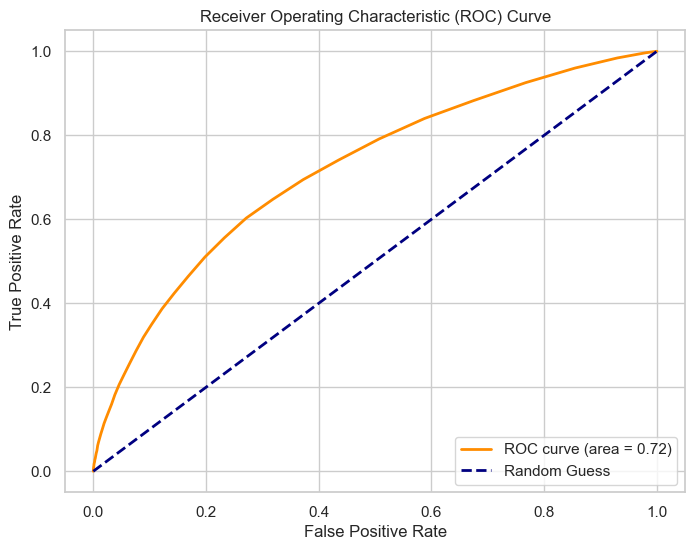

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = RandomForest_regular.predict_proba(X_test)[:, 1]

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Normalization Data

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Train_normalised= application_train_encoded.copy()
# Create a DataFrame from the dictionary

numeric_cols = Train_normalised.select_dtypes(include=['int', 'float']).columns

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns
Train_normalised[numeric_cols] = scaler.fit_transform(Train_normalised[numeric_cols])

Train_normalised.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.207607,0.205338,0.334725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.0,0.286846,0.708980,0.494193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.0,0.049128,0.051108,0.074449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.0,0.128368,0.152007,0.407021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.112520,0.265760,0.293619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

Y1= Train_normalised.TARGET
X1= Train_normalised.drop('TARGET', axis=1)


# Split the data into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.30, random_state=0, stratify= Y)

Y1_train.sum()
Y1_test.sum()

print('X1_train', X1_train.shape)
print('X1_test', X1_test.shape)
print('Y1_train', Y1_train.shape)
print('Y1_test', Y1_test.shape)

# Initialize the logistic regression model
logreg_normalised = LogisticRegression()

# Fit the model to the training data
logreg_normalised.fit(X1_train, Y1_train)

# Predict the target variable for the test data
y1_pred = logreg_normalised.predict(X1_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y1_test, y1_pred)
print("Accuracy:", accuracy)

X1_train (215257, 121)
X1_test (92254, 121)
Y1_train (215257,)
Y1_test (92254,)
Accuracy: 0.9192013354434496


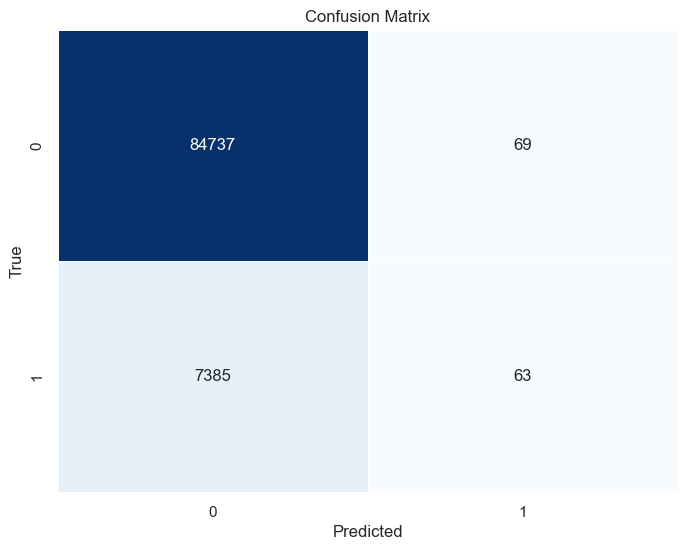

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(Y1_test, y1_pred)
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
class_report = classification_report(Y1_test, y1_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

# Convert the classification report to a dictionary for plotting
class_report_dict = classification_report(Y1_test, y1_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     84806
     Class 1       0.48      0.01      0.02      7448

    accuracy                           0.92     92254
   macro avg       0.70      0.50      0.49     92254
weighted avg       0.88      0.92      0.88     92254



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Assuming you have X1_train, X1_test, Y1_train, Y1_test from your previous code

# Define the logistic regression model
logreg = LogisticRegression()

# Define the hyperparameter grid to search through
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X1_train, Y1_train)

# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Predict the target variable for the test data
y1_pred = best_logreg.predict(X1_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(Y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate the AUC-ROC score of the best model
best_auc_roc = roc_auc_score(Y1_test, best_logreg.predict_proba(X1_test)[:, 1])
print("Best AUC-ROC:", best_auc_roc)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.9192013354434496
Best AUC-ROC: 0.738917762592695
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


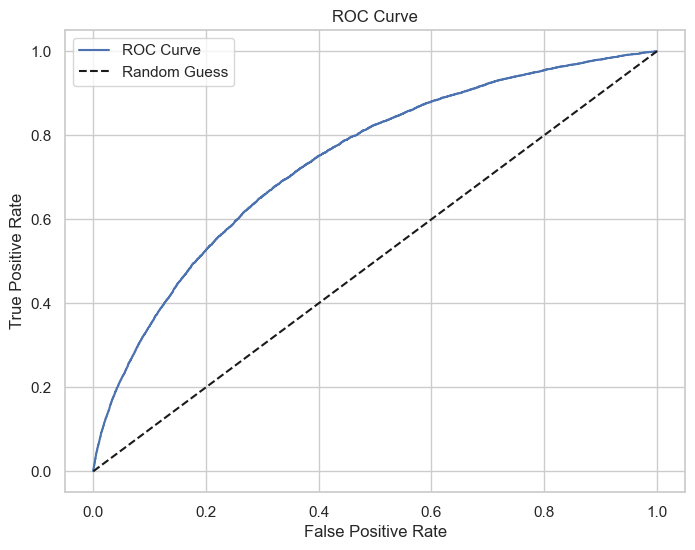

In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y1_pred_prob = logreg_normalised.predict_proba(X1_test)[:, 1]

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(Y1_test, y1_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# RESULT

Model yang telah dibuat memang meningkatkan kemampuan Home Credit untuk memprediksi apakah seseorang akan gagal bayar atau tidak. Hal ini berdampak positif pada keuntungan Home Credit karena akan meningkatkan % pinjaman yang disetujui untuk pengajuan yang layak kredit dan menurunkan % pinjaman yang disetujui untuk pengajuan yang tidak layak kredit. perlu diperhatikan bahwa dalam data training masih banyak missing value yang berimpact pada hasil akurasi pada tahap test nantinya, kedepan tentu data yang diberikan sebagai data training harus memiliki lebih sedikit missing value dibanding dengan data yang ada sekarang.

Jika dilihat dari confusion matrix masing-masing model bisa dikatakan model cukup baik dalam mengidentifikasi berhasil membayar dan mengidentifkasi orang yang gagal bayar, jika ditelusuri lebih jauh akurasi yang didapat pada Model Logistic Regression dan Random Forest ialah sebesar 92% dengan Roc Auc paling bagus yaitu pada Logistic Regression, maka dalam hal ini saya menyarankan untuk menggunakan logistic regression nantinya dalam tahap test pada data test.